# Estación Barrio del Pilar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_39.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,54.322581
2013-02-01,38.870968
2013-03-01,33.451613
2013-04-01,28.935484
2013-05-01,27.483871


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

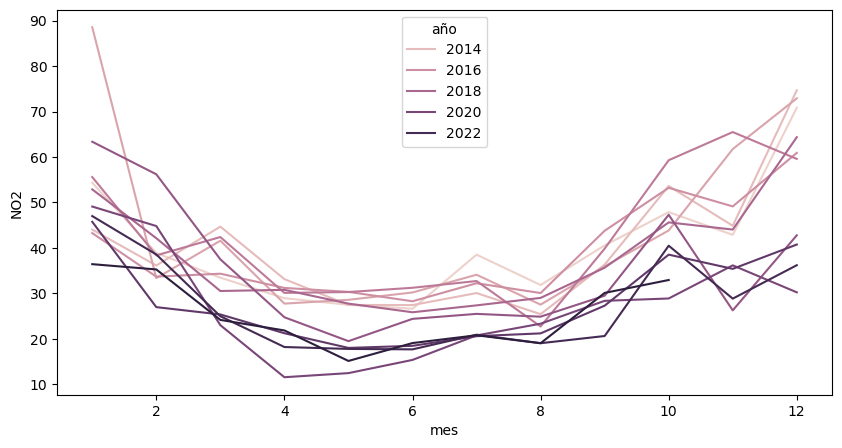

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

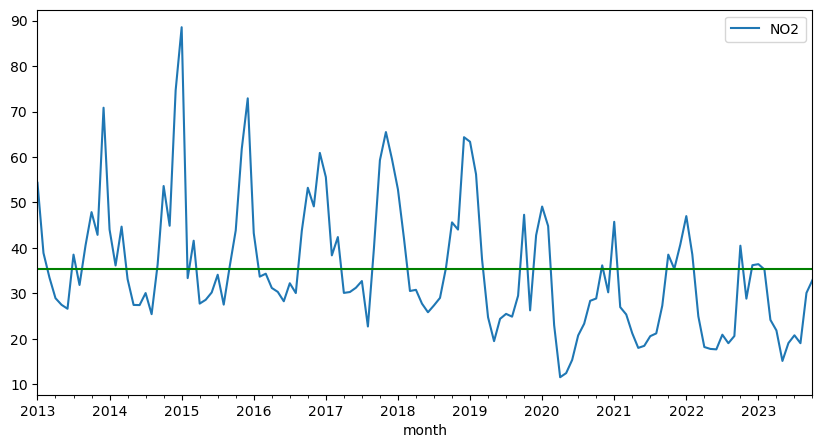

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

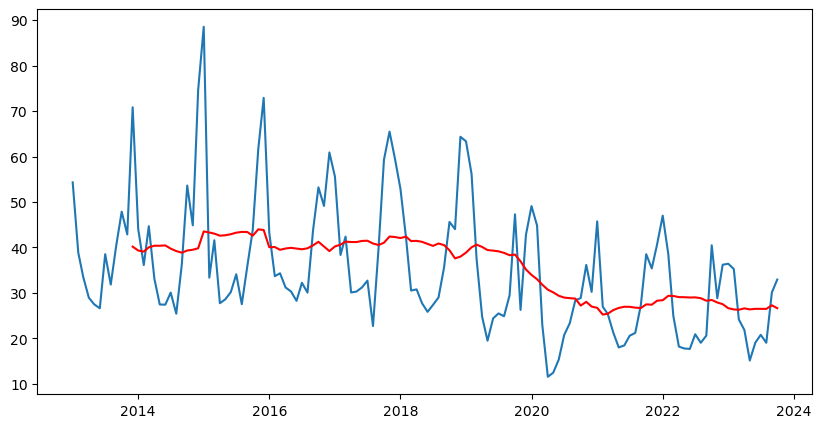

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

### Test de Fuller

In [11]:
res = adfuller(df["NO2"])
res

(-0.49458817204192845,
 0.8930682588893248,
 11,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 826.8082509120716)

In [12]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.49458817204192845
p-value 0.8930682588893248
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [13]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6763333417007905
2 mes Lag, 0.4170812649289846
3 mes Lag, 0.17713595178296096
4 mes Lag, -0.10620985895931394
5 mes Lag, -0.2515515692917584
6 mes Lag, -0.28601389727436827
7 mes Lag, -0.2745330198517132
8 mes Lag, -0.12483581915739468
9 mes Lag, 0.14988331067616997
10 mes Lag, 0.40895365402923595
11 mes Lag, 0.6341058556227973
12 mes Lag, 0.7684580446863085
13 mes Lag, 0.6551278164830575
14 mes Lag, 0.39708429457515415
15 mes Lag, 0.1697500897308377
16 mes Lag, -0.13717052570926933
17 mes Lag, -0.30507641888180637
18 mes Lag, -0.34387546984692074
19 mes Lag, -0.32674363952216523
20 mes Lag, -0.16945701251034287
21 mes Lag, 0.11091557503388694
22 mes Lag, 0.31422066670008286
23 mes Lag, 0.5945523803362369
24 mes Lag, 0.7480819522111076
25 mes Lag, 0.5838047727893004
26 mes Lag, 0.3774708667547527
27 mes Lag, 0.1346206486792263
28 mes Lag, -0.1624873511209347
29 mes Lag, -0.3490773928055193
30 mes Lag, -0.43026445386045054
31 mes Lag, -0.3948044858658027
32 m

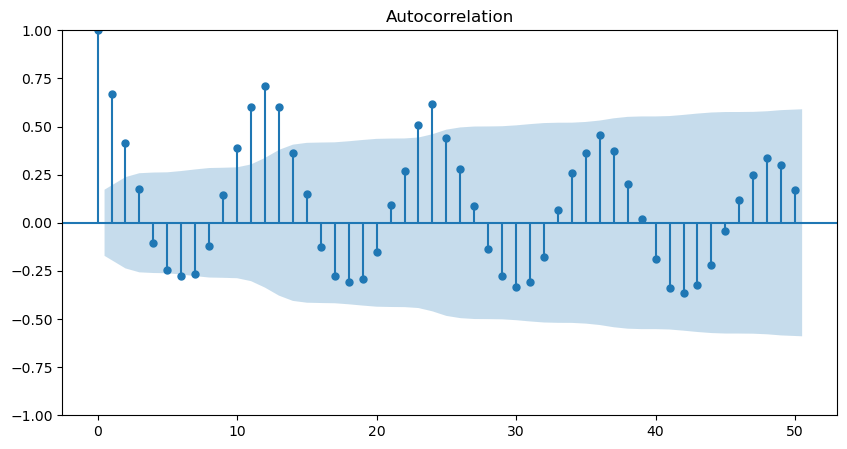

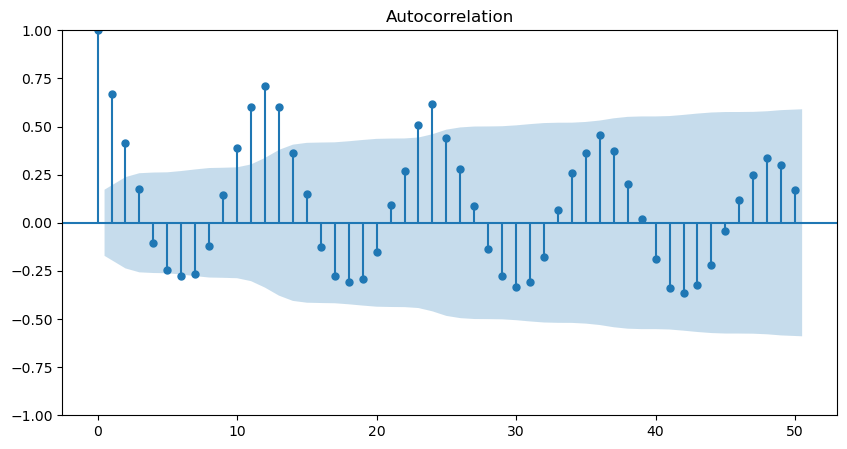

In [14]:
plot_acf(df, lags = 50)

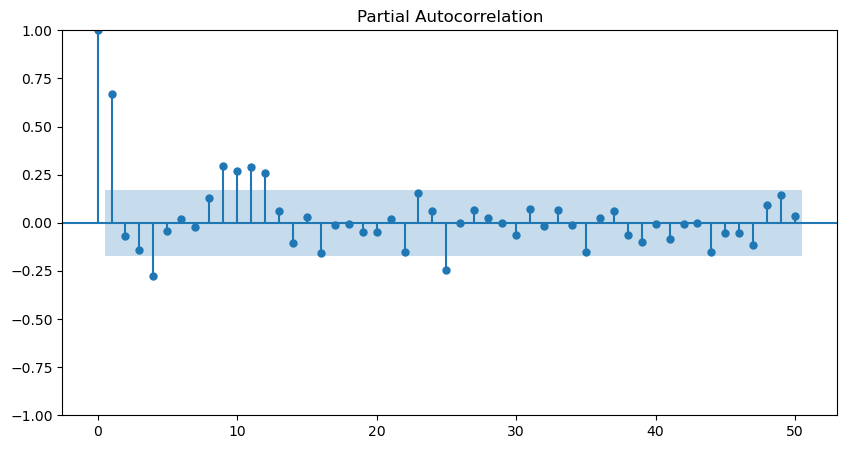

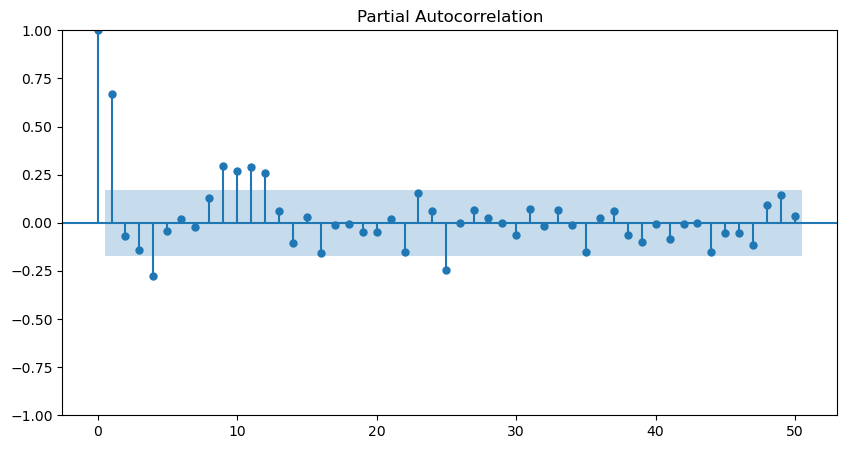

In [15]:
plot_pacf(df, lags = 50)

In [16]:
df.head()

,NO2
month,
2013-01-01,54.322581
2013-02-01,38.870968
2013-03-01,33.451613
2013-04-01,28.935484
2013-05-01,27.483871


In [17]:
df.shape

(130, 1)

In [18]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [19]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [20]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [21]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(4, 1, 3, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error mae:  3.8593712555692954
CPU times: total: 2.03 s
Wall time: 6.44 s


,real,pred,error
2021-05-01,18.000000,19.413808,1.413808
2021-06-01,18.451613,22.112000,3.660387
2021-07-01,20.580645,24.763759,4.183114
2021-08-01,21.193548,25.533068,4.339520
2021-09-01,27.290323,31.494661,4.204339
2021-10-01,38.516129,41.132260,2.616131
2021-11-01,35.387097,35.789829,0.402732
2021-12-01,40.741935,44.890780,4.148845
2022-01-01,47.000000,51.615723,4.615723
2022-02-01,38.548387,39.088166,0.539779


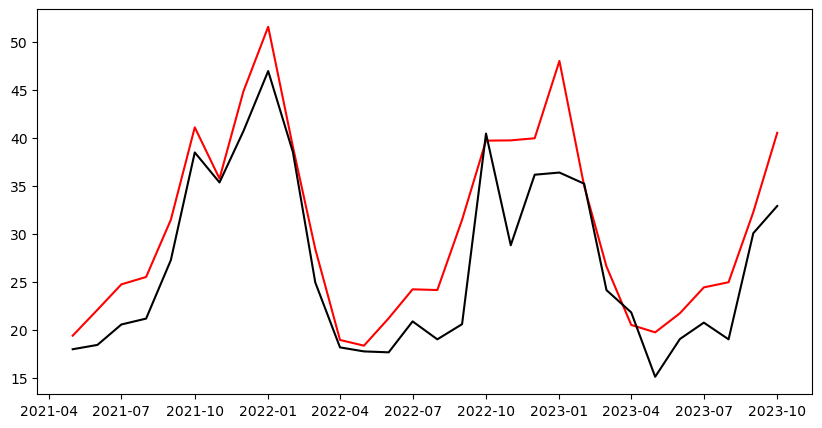

In [22]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [23]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-11-01,40.351813
2023-12-01,42.910252
2024-01-01,50.145446
2024-02-01,39.014905
2024-03-01,28.253998
2024-04-01,21.130320
2024-05-01,19.517742
2024-06-01,22.126583
2024-07-01,24.469553
2024-08-01,24.789194


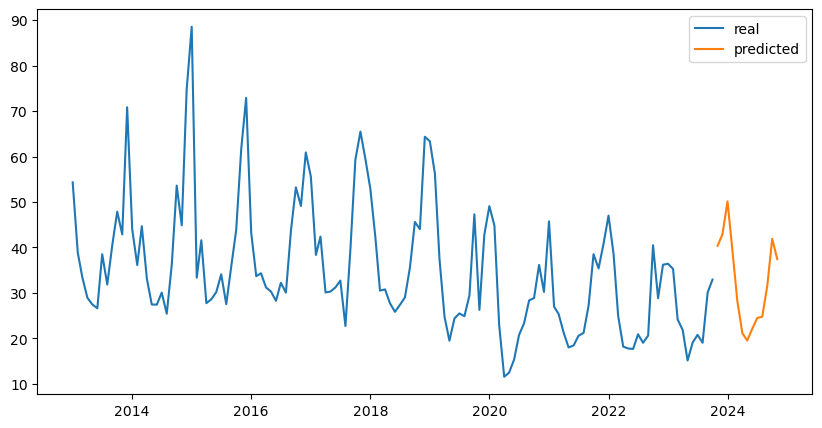

In [24]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [25]:
pred_año.mean()

predicted_mean    32.589296
dtype: float64